In [429]:
import numpy as np
import random
import matplotlib.pyplot as plt

MAX_OFFER = 10
MAINTENANCE_COST = 0.1
OFFER_PROBABILITIES = [0.0, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.3, 0.1]
NUM_OFFERS = len(OFFER_PROBABILITIES)

In [430]:
def simulate_episode_cost(policy):
    state = 0
    total_cost = 0
    while True:
        if policy[state] == 1:  # Stop
            return total_cost - state
        else:  # Continue
            offer = np.random.choice(range(NUM_OFFERS), p=OFFER_PROBABILITIES)
            state = max(state, offer)
            total_cost += MAINTENANCE_COST

def evaluate_policy(policy, num_episodes=100):
    total_cost = sum(simulate_episode_cost(policy) for _ in range(num_episodes))
    return total_cost / num_episodes

In [431]:
def q_learning(num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((MAX_OFFER + 1, 2))  # Q-table: state x action (0: continue, 1: stop)
    Q_prev = np.zeros((NUM_OFFERS, num_episodes, 2))
    update_count = np.zeros((MAX_OFFER + 1, 2), dtype=int)  # Count of updates for each state-action pair
    
    for episode in range(num_episodes):
        state = 0  # Start with no offer
        done = False
        
        while not done:
            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action = random.randint(0, 1)
            else:
                action = np.argmin(Q[state])
            
            if action == 1:  # Stop
                reward = -state # Include maintenance cost
                done = True
                next_state = state
            else:  # Continue
                offer = np.random.choice(range(NUM_OFFERS), p=OFFER_PROBABILITIES)
                reward = MAINTENANCE_COST
                next_state = max(state, offer)
            
            # Q-value update
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.min(Q[next_state]))
            update_count[state, action] += 1
            
            state = next_state

        Q_prev[:,episode,:]=Q
    
    
    # Derive policy from Q-values
    policy = np.argmin(Q, axis=1)
    return policy, Q, Q_prev, update_count


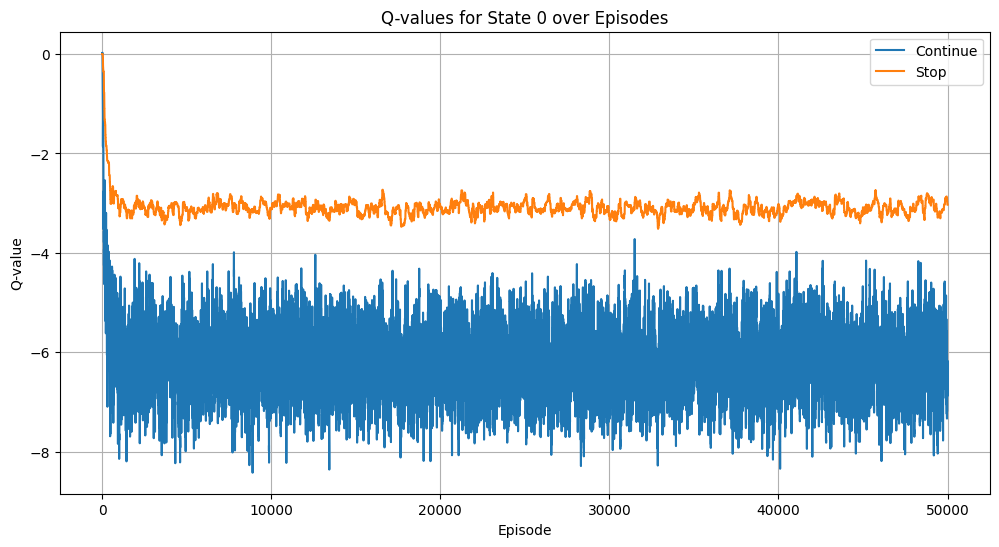

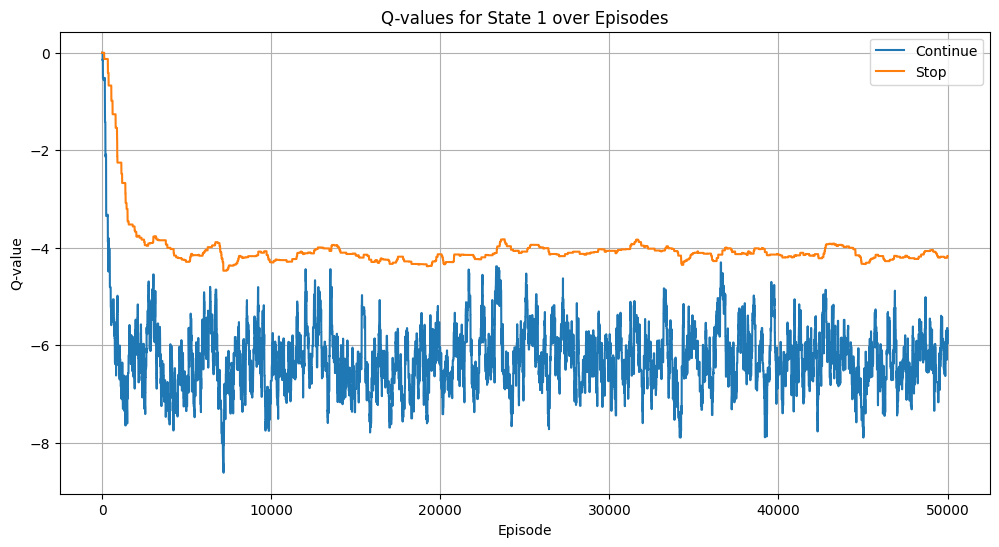

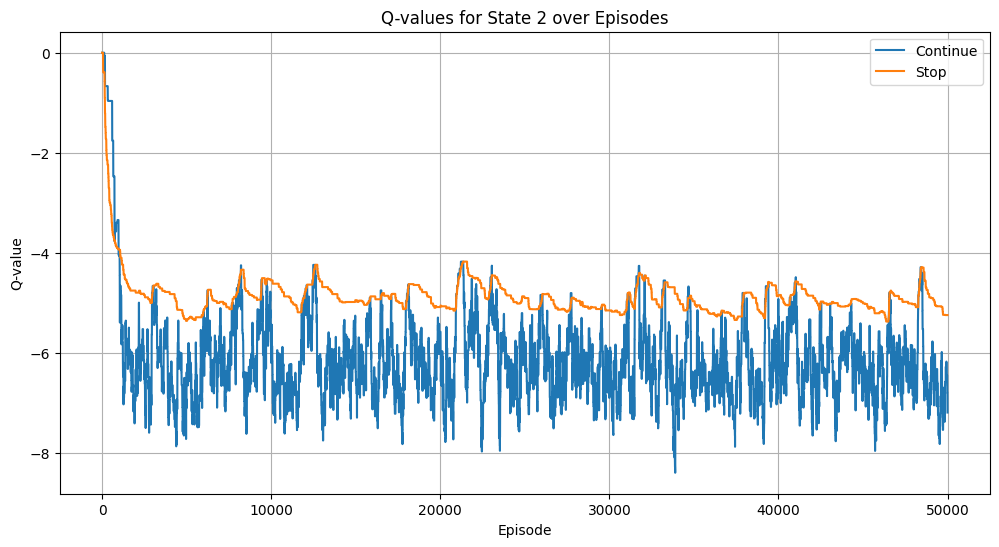

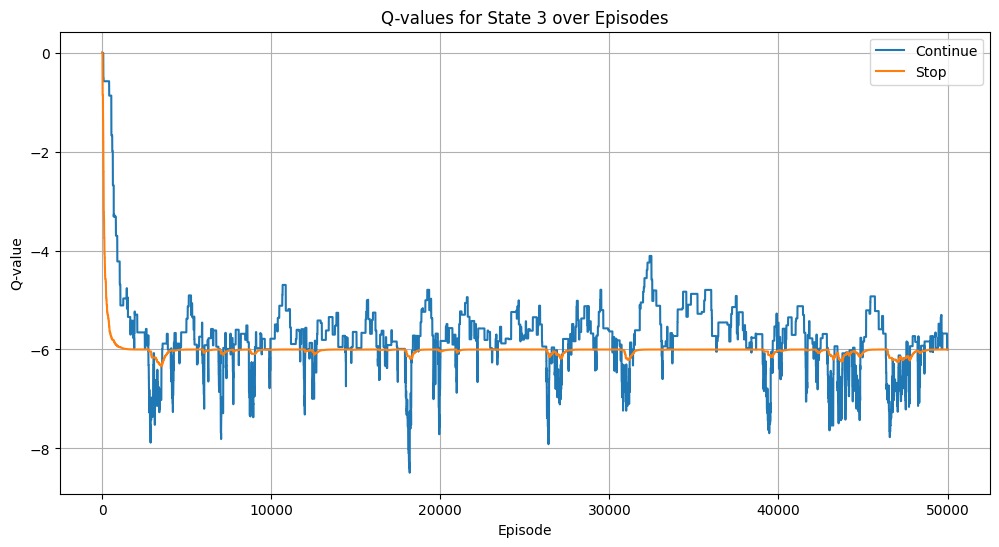

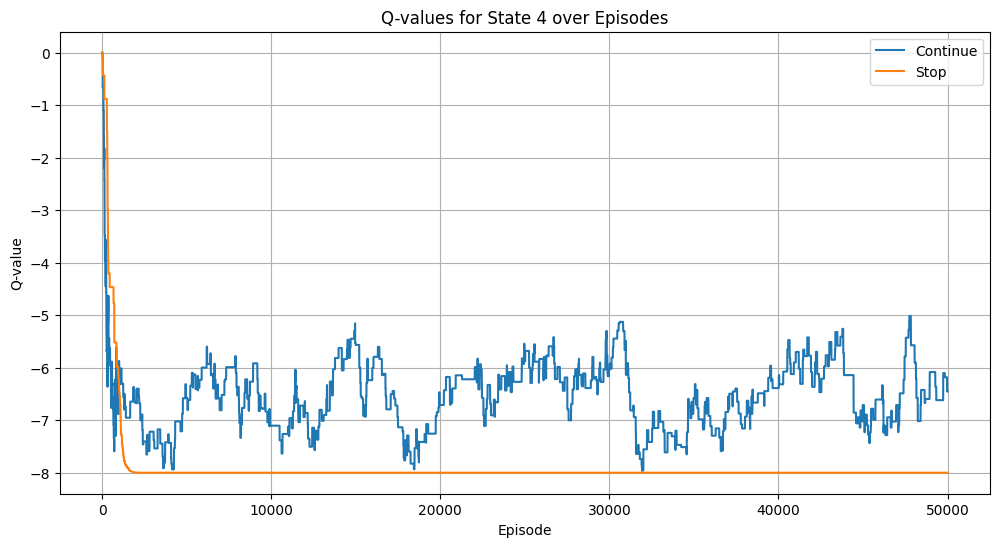

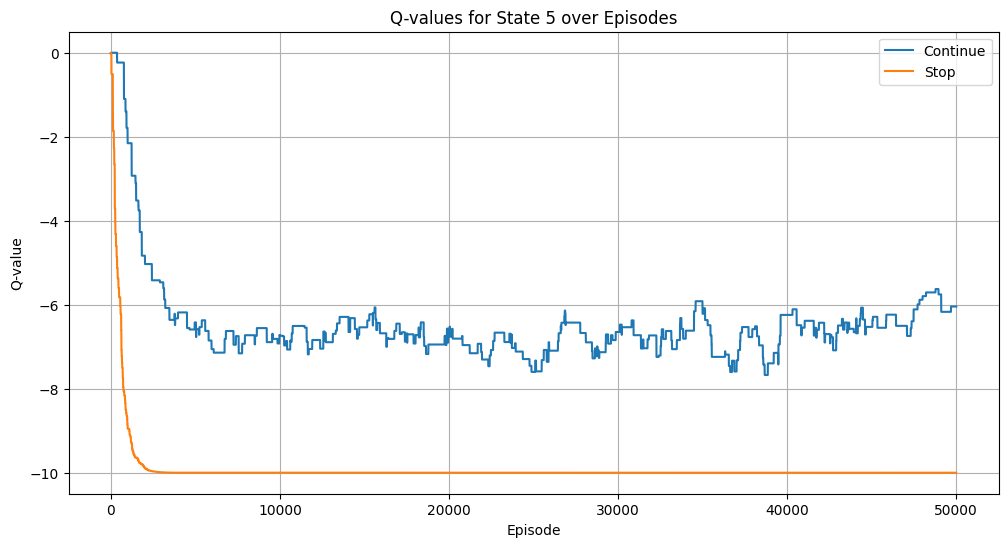

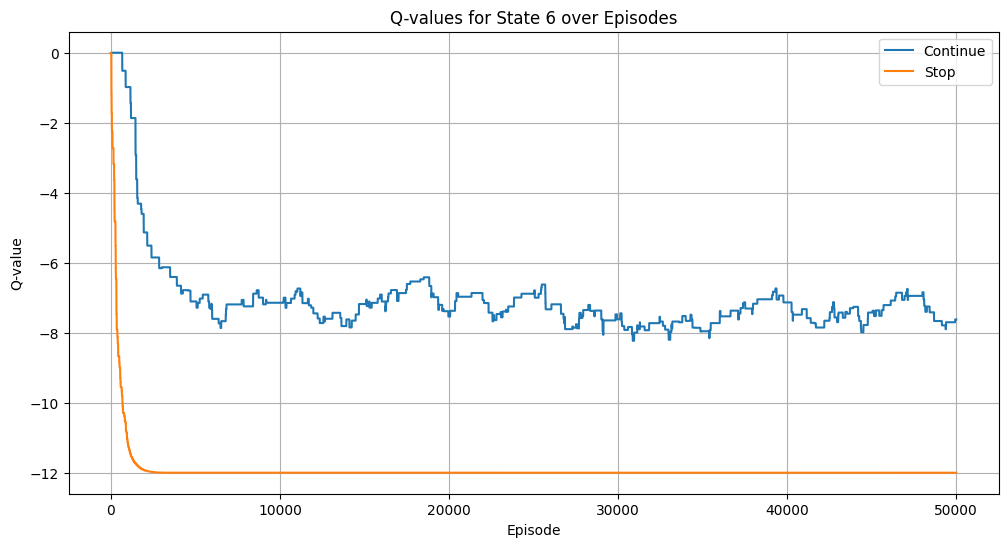

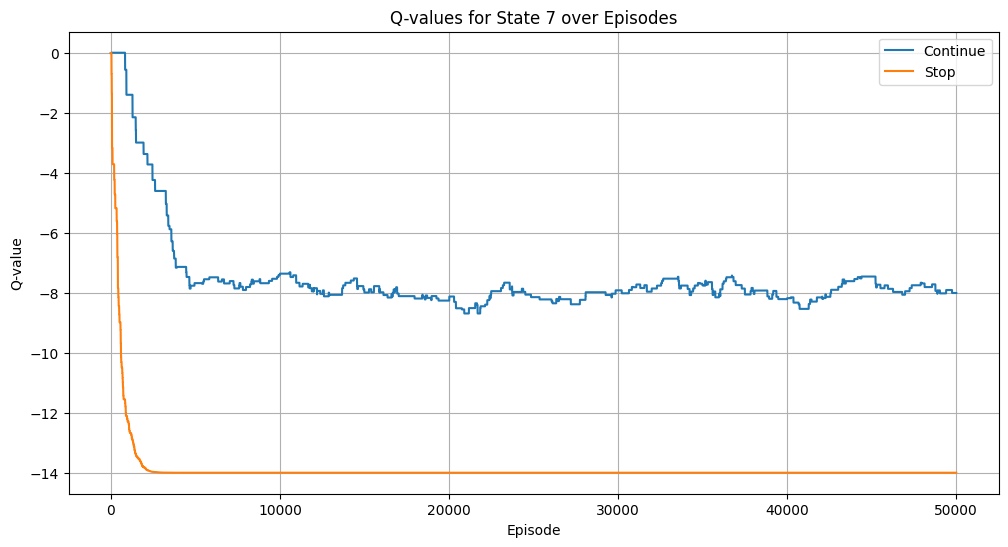

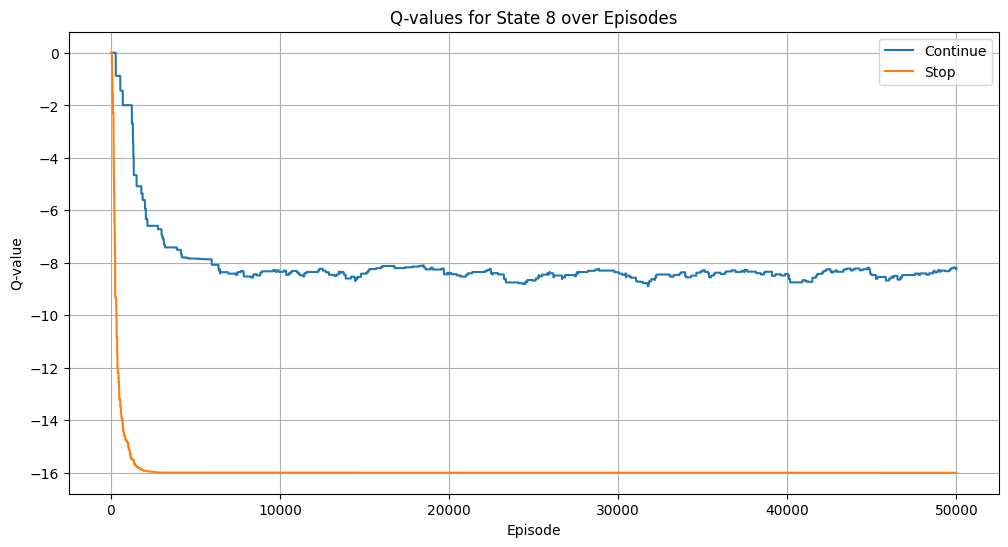

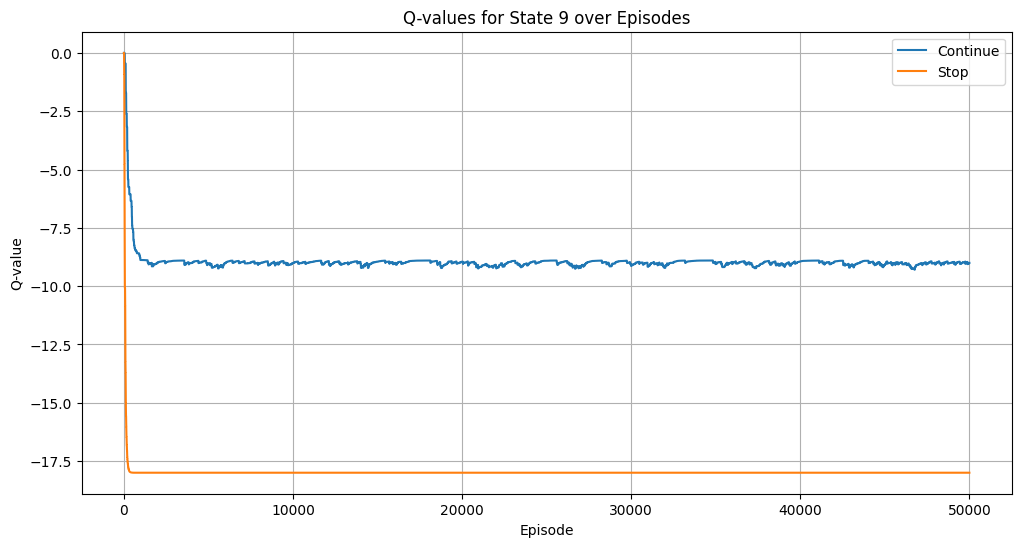

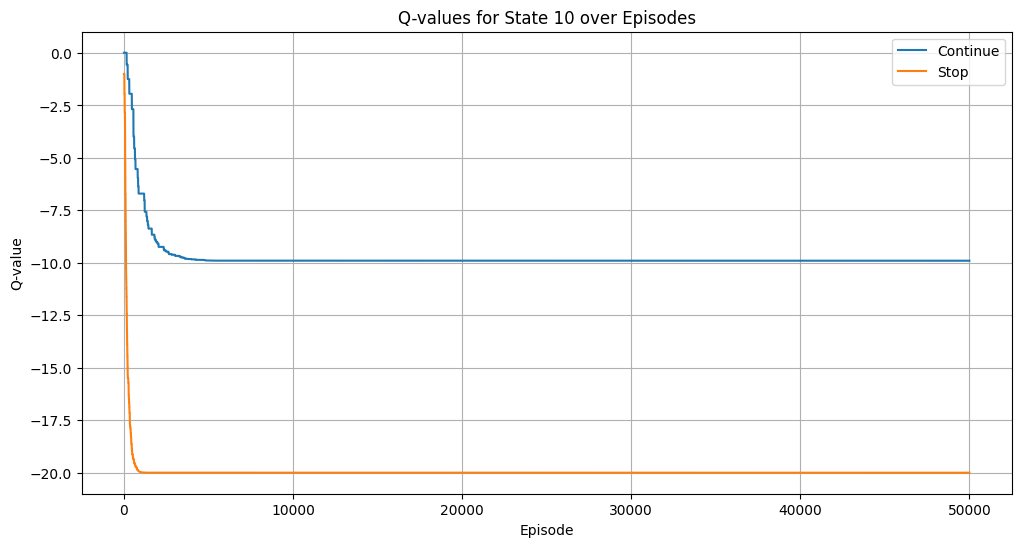

In [432]:
num_runs = 1
results = []

for run in range(num_runs):
    policy, Q, Q_prev, update_count = q_learning(num_episodes=50000, alpha=0.1, gamma=0.5, epsilon=0.2)
    avg_cost = evaluate_policy(policy)
    results.append((run, policy, avg_cost, update_count))

num_episodes=50000

for state in range(NUM_OFFERS):
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_episodes), Q_prev[state,:, 0], label='Continue')
    plt.plot(range(num_episodes), Q_prev[state,:, 1], label='Stop')
    plt.xlabel('Episode')
    plt.ylabel('Q-value')
    plt.title(f'Q-values for State {state} over Episodes')
    plt.legend()
    plt.grid(True)
    plt.show()


# # Sort results by average cost (ascending order)
# results.sort(key=lambda x: x[2])

In [435]:
for run, policy, avg_cost, update_count in results:
    print(f"Update Counts:")
    print(update_count)
    print("\n")

Update Counts:
[[44969  5031]
 [ 4504   532]
 [ 4959   906]
 [ 1501  4400]
 [  723  5210]
 [  318  2656]
 [  296  2698]
 [  276  2651]
 [  311  2753]
 [ 1919 17154]
 [  685  6009]]




In [437]:
# # Print results
# print("Q-learning results (sorted by average cost):")
# for run, policy, avg_cost in results:
#     print(f"Run {run + 1}: Avg Cost = {avg_cost:.2f}, Policy = {policy}")

# Choose the best policy
best_run, best_policy, best_avg_cost, update_count = results[0]
print(f"\nBest policy (Run {best_run + 1}):")
print(f"Average Cost: {best_avg_cost:.2f}")
print(f"Policy: {best_policy}")


Best policy (Run 1):
Average Cost: -7.24
Policy: [0 0 0 1 1 1 1 1 1 1 1]


In [ ]:
# all_policies = np.zeros((num_runs, MAX_OFFER + 1))
# all_costs = np.zeros(num_runs)

# for run in range(num_runs):
#     curr_run, policy_run, avg_cost_run = results[run]
#     all_policies[run] = policy_run
#     all_costs[run] = avg_cost_run


# # Calculate average policy
# average_policy = np.mean(all_policies, axis=0)

# # Convert average policy to deterministic policy
# deterministic_average_policy = np.round(average_policy).astype(int)

# # Calculate the average cost
# average_cost = np.mean(all_costs)

# print("Average Policy:", deterministic_average_policy)
# print(f"Average Cost: {average_cost:.2f}",)

# # If you want to evaluate the average policy
# average_policy_cost = evaluate_policy(deterministic_average_policy)
# print("Cost of Average Policy:", average_policy_cost)